In [19]:
import yfinance as yf
import pandas as pd
import matplotlib as plt
import numpy as np

In [20]:
#sp500_tickers = yf.download('^GSPC', period='1d')['Symbol'].to_list()
# list of NASDAQ stock symbols  - to be expanded
nasdaq_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'ADBE']

def download_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)
    return data['Adj Close']

In [21]:

# read the S&P 500 company symbols from the Wikipedia page
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

sp500_list = sp500[0]['Symbol'].tolist()

In [22]:
def download_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)
    return data['Adj Close']

In [23]:
# calculate correlations between stocks
def calculate_correlations(stock_data):
    return stock_data.corr()

# date range
start_date = '2022-01-01'
end_date = '2024-01-01'

In [24]:

# Download historical price data
stock_data = download_data(nasdaq_symbols , start_date, end_date)



[*********************100%%**********************]  9 of 9 completed


In [25]:
stock_data.head()


Ticker,AAPL,ADBE,AMZN,GOOGL,INTC,META,MSFT,NVDA,TSLA
Date,,,,,,,,,
2022-01-03,179.724533,564.369995,170.404495,144.991501,49.865269,338.181183,328.120911,300.781036,399.926666
2022-01-04,177.443558,554.000000,167.522003,144.399506,49.799667,336.173309,322.494568,292.482880,383.196655
2022-01-05,172.723587,514.429993,164.356995,137.774994,50.483776,323.826416,310.114685,275.646912,362.706665
2022-01-06,169.840256,514.119995,163.253998,137.747498,50.614975,332.107635,307.664185,281.378693,354.899994
2022-01-07,170.008118,510.700012,162.554001,137.016998,50.080807,331.438354,307.820984,272.082001,342.320007


In [26]:

# alculate correlations among all stocks
corr_matr = calculate_correlations(stock_data)


In [27]:
# correlation threshold for pair selection
correlation_threshold = 0.8

# Filter pairs with correlation above the threshold
correlated_pairs1 = []

for stock1 in nasdaq_symbols :
    for stock2 in nasdaq_symbols :
        if stock1 != stock2 and corr_matr.loc[stock1, stock2] > correlation_threshold:
            correlated_pairs1.append((stock1, stock2))



In [28]:
# function to calculate the spread between two stocks
def calculate_spread(stock_data1, stock_data2):
    return stock_data1 - stock_data2

entry_threshold = 2  # Adjust as needed
exit_threshold = 0   # No exit threshold for this example

# Initialize trading positions as 'None'
positions = {pair: None for pair in correlated_pairs1}

# backtest the pairs trading strategy
portfolio_value = []
cash = 100000  
stock1_units = {pair: 0 for pair in correlated_pairs1}
stock2_units = {pair: 0 for pair in correlated_pairs1}

for date, row in stock_data.iterrows():
    daily_portfolio_value = cash

    for pair in correlated_pairs1:
        stock1_symbol, stock2_symbol = pair
        stock1_price = row[stock1_symbol]
        stock2_price = row[stock2_symbol]

        # spread
        spread = stock1_price - stock2_price

        if positions[pair] is None and spread > entry_threshold:
            positions[pair] = 'Long'
            stock1_units[pair] = cash / 2 / stock1_price
            stock2_units[pair] = cash / 2 / stock2_price
            cash = 0
        elif positions[pair] == 'Long' and spread < exit_threshold:
            positions[pair] = None
            cash += stock1_units[pair] * stock1_price + stock2_units[pair] * stock2_price
            stock1_units[pair] = 0
            stock2_units[pair] = 0

        # daily portfolio value
        daily_portfolio_value += stock1_units[pair] * stock1_price + stock2_units[pair] * stock2_price

    portfolio_value.append(daily_portfolio_value)


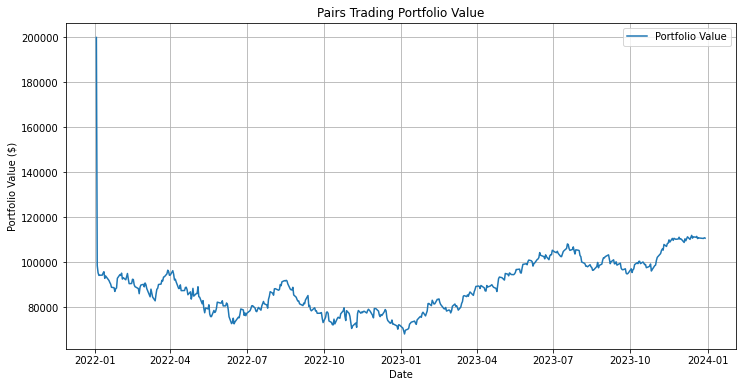

In [29]:
import matplotlib.pyplot as plt

# plot portfolio value
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Pairs Trading Portfolio Value')
plt.grid(True)
plt.legend()
plt.show()


In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

ticker_symbols = ["AAPL", "MSFT"]

stock_data = yf.download(ticker_symbols, start="2022-01-01", end="2022-12-31")

adj_closing_prices = stock_data["Adj Close"]
daily_returns = adj_closing_prices.pct_change().dropna()

daily_returns["Signal"] = (daily_returns["AAPL"] > daily_returns["MSFT"]).astype(int)

X = daily_returns[["AAPL", "MSFT"]]
y = daily_returns["Signal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)


[*********************100%%**********************]  2 of 2 completed

Confusion Matrix:
 [[31  2]
 [ 0 17]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.89      1.00      0.94        17

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



try with all of sp500

In [36]:
stock_data_sp500 = download_data(sp500_list , start_date, end_date)

[*********************100%%**********************]  503 of 503 completed

4 Failed downloads:
['SOLV', 'GEV']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1704085200")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-01-01)')


In [37]:
corr_matr2=calculate_correlations(stock_data_sp500)


correlation_threshold = 0.7

correlated_pairs = []

for stock1 in sp500_list :
    for stock2 in sp500_list :
        if stock1 != stock2 and corr_matr2.loc[stock1, stock2] > correlation_threshold:
            correlated_pairs.append((stock1, stock2))

print("Correlated Pairs:")
for pair in correlated_pairs:
    print(pair)

Correlated Pairs:
('MMM', 'ABT')
('MMM', 'ARE')
('MMM', 'LNT')
('MMM', 'AMT')
('MMM', 'AVB')
('MMM', 'BALL')
('MMM', 'BAC')
('MMM', 'BAX')
('MMM', 'BIO')
('MMM', 'TECH')
('MMM', 'BXP')
('MMM', 'CPT')
('MMM', 'COF')
('MMM', 'KMX')
('MMM', 'CTLT')
('MMM', 'CNC')
('MMM', 'CRL')
('MMM', 'SCHW')
('MMM', 'CHTR')
('MMM', 'C')
('MMM', 'CFG')
('MMM', 'CMA')
('MMM', 'CCI')
('MMM', 'CVS')
('MMM', 'DHR')
('MMM', 'D')
('MMM', 'EMN')
('MMM', 'EBAY')
('MMM', 'EW')
('MMM', 'EQR')
('MMM', 'ESS')
('MMM', 'EL')
('MMM', 'ES')
('MMM', 'EXR')
('MMM', 'FFIV')
('MMM', 'FRT')
('MMM', 'FIS')
('MMM', 'FITB')
('MMM', 'GEN')
('MMM', 'GNRC')
('MMM', 'GM')
('MMM', 'HAS')
('MMM', 'DOC')
('MMM', 'HRL')
('MMM', 'HPQ')
('MMM', 'ILMN')
('MMM', 'IFF')
('MMM', 'IP')
('MMM', 'IVZ')
('MMM', 'INVH')
('MMM', 'KDP')
('MMM', 'KEY')
('MMM', 'KIM')
('MMM', 'LHX')
('MMM', 'MTB')
('MMM', 'MTCH')
('MMM', 'MDT')
('MMM', 'MAA')
('MMM', 'MHK')
('MMM', 'NEM')
('MMM', 'NSC')
('MMM', 'NTRS')
('MMM', 'PARA')
('MMM', 'PYPL')
('MMM', 'PFE')
(

In [39]:
# Function to calculate the spread between two stocks
def calculate_spread(stock_data1, stock_data2):
    return stock_data1 - stock_data2

entry_threshold = 2 
exit_threshold = 0   

positions = {pair: None for pair in correlated_pairs}

# Backtest the pairs trading strategy
portfolio_value = []
cash = 100000  
stock1_units = {pair: 0 for pair in correlated_pairs}
stock2_units = {pair: 0 for pair in correlated_pairs}

for date, row in stock_data_sp500.iterrows():
    daily_portfolio_value = cash

    for pair in correlated_pairs:
        stock1_symbol, stock2_symbol = pair
        stock1_price = row[stock1_symbol]
        stock2_price = row[stock2_symbol]

        spread = stock1_price - stock2_price

        # Entry conditions
        if positions[pair] is None and spread > entry_threshold:
            positions[pair] = 'Long'
            stock1_units[pair] = cash / 2 / stock1_price
            stock2_units[pair] = cash / 2 / stock2_price
            cash = 0
        # Exit conditions
        elif positions[pair] == 'Long' and spread < exit_threshold:
            positions[pair] = None
            cash += stock1_units[pair] * stock1_price + stock2_units[pair] * stock2_price
            stock1_units[pair] = 0
            stock2_units[pair] = 0

        # Update daily portfolio value
        daily_portfolio_value += stock1_units[pair] * stock1_price + stock2_units[pair] * stock2_price

    portfolio_value.append(daily_portfolio_value)


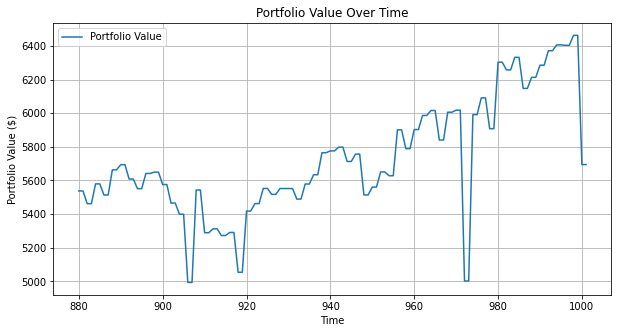

In [56]:
def calculate_spread(stock_data1, stock_data2):
    return stock_data1 - stock_data2

entry_threshold = 2 
exit_threshold = 0   

# Initializing positions and units for each pair
positions = {pair: None for pair in correlated_pairs}
stock1_units = {pair: 0 for pair in correlated_pairs}
stock2_units = {pair: 0 for pair in correlated_pairs}

portfolio_value = []
cash = 100000  # Initial cash

for date, row in stock_data_sp500.iterrows():
    daily_portfolio_value = cash  # Start with cash in hand
    active_trades = False  # Flag to check if any trades are active

    for pair in correlated_pairs:
        stock1_symbol, stock2_symbol = pair
        stock1_price = row[stock1_symbol]
        stock2_price = row[stock2_symbol]

        spread = stock1_price - stock2_price

        # Entry conditions
        if positions[pair] is None and spread > entry_threshold and cash > 0:
            invest_amount = cash / 4  # Change this to allocate less per trade
            stock1_units[pair] = invest_amount / stock1_price
            stock2_units[pair] = invest_amount / stock2_price
            cash -= invest_amount * 2  # Only subtract the invested amount

            positions[pair] = 'Long'
            active_trades = True


        # Exit conditions
        elif positions[pair] == 'Long' and spread < exit_threshold:
            # Closing positions
            cash += stock1_units[pair] * stock1_price + stock2_units[pair] * stock2_price
            stock1_units[pair] = 0
            stock2_units[pair] = 0
            positions[pair] = None

        # Update daily portfolio value
        daily_portfolio_value += stock1_units[pair] * stock1_price + stock2_units[pair] * stock2_price
        if not active_trades:
            daily_portfolio_value = cash  # Use cash as the portfolio value if no trades are active

    portfolio_value.append(daily_portfolio_value)


    portfolio_value.append(daily_portfolio_value)

# Optional: Plotting the portfolio value over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
portfolio_value

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [49]:
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

initial_price = sp500['Close'].iloc[0]
final_price = sp500['Close'].iloc[-1]

shares_purchased = 100000 / initial_price

final_value = shares_purchased * final_price

sp500['Investment'] = (sp500['Close'] / initial_price) * 100000



[*********************100%%**********************]  1 of 1 completed


In [50]:
stock_data_sp500

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,154.085480,18.750000,179.724564,122.946854,172.679993,132.760483,44.549999,392.488190,564.369995,169.809097,...,227.957016,36.110714,86.880440,63.231583,58.553646,113.576187,130.826553,123.143150,583.900024,229.051270
2022-01-04,148.876434,19.020000,177.443542,122.710808,170.800003,129.638138,45.130001,389.683380,554.000000,168.275406,...,230.956802,36.573555,86.603271,63.631794,60.756073,114.781013,131.526062,124.392410,587.599976,220.330856
2022-01-05,146.326050,18.680000,172.723587,123.355392,162.250000,129.055710,44.599998,382.820770,514.429993,165.677704,...,229.350464,35.665672,83.396111,64.255363,61.511730,113.216652,129.858780,123.982353,558.179993,211.952942
2022-01-06,146.838089,18.570000,169.840256,122.774338,159.750000,129.036606,44.860001,364.334167,514.119995,166.204910,...,226.766739,35.950500,83.782166,63.752777,62.958530,113.061203,131.200302,122.952431,555.159973,212.794647
2022-01-07,142.928833,19.280001,170.008118,122.456589,166.050003,129.437668,45.070000,357.346313,510.700012,161.843445,...,224.076569,35.905994,83.693069,64.311195,63.474583,112.157562,129.695877,122.208595,530.859985,206.599289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,139.108368,14.310000,193.353287,152.053635,140.800003,107.970345,73.839996,351.798248,598.750000,196.175598,...,238.479218,34.016365,90.206200,60.886738,100.971611,112.312424,129.352661,120.094162,269.410004,193.985657
2023-12-26,139.347549,14.110000,192.803986,151.739594,138.720001,108.168404,73.510002,350.785858,598.260010,197.937286,...,237.485931,34.283665,90.784828,61.073143,101.199486,113.289574,129.611359,121.192108,275.500000,194.503006
2023-12-27,139.357529,13.990000,192.903839,151.994751,136.550003,108.722954,73.540001,351.172943,596.080017,198.415039,...,237.694534,34.412361,90.415703,60.885166,100.723907,114.047363,130.188477,120.902649,275.790009,195.895859


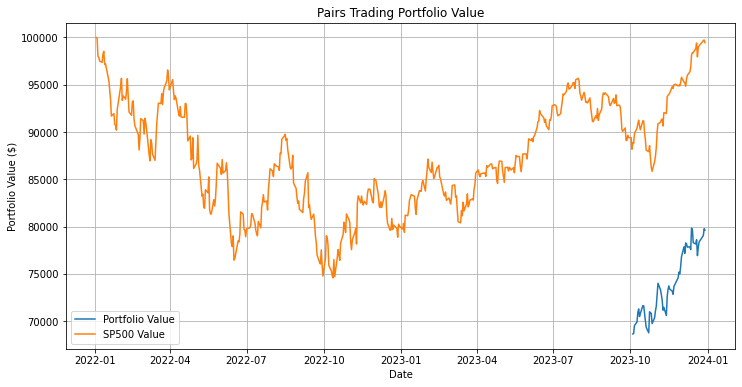

In [51]:
import matplotlib.pyplot as plt

# Plot portfolio value
plt.figure(figsize=(12, 6))
plt.plot(stock_data_sp500.index, portfolio_value, label='Portfolio Value')
plt.plot(stock_data_sp500.index, sp500['Investment'] , label='SP500 Value')

plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Pairs Trading Portfolio Value')
plt.grid(True)
plt.legend()
plt.show()
